# House Prices Prediction

## 1. Data Extraction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read train.csv file to analyze and build model
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From df.info() above, we know there are several columns have very much missing values, so we can decide to remove that columns

## 2. Feature Engineering

**(a). From df.info(), we know there are some features contain very less information (data), so we can decide to drop that features**

In [6]:
# drop features contain very less information (data)
df.drop(df[['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu']], axis=1, inplace=True)

**(b). Handle some missing values in some features**

- **Column LotFrontage**

In column LotFrontage, we know that column has datatype float, so we can look data distribution of that column with histogram

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

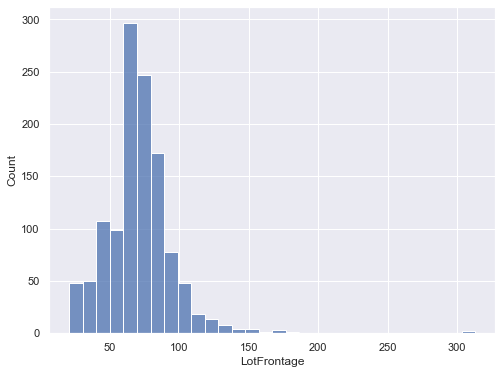

In [7]:
# Histogram column LotFrontage
sns.set()
plt.figure(figsize=(8,6))
sns.histplot(x='LotFrontage', data=df, bins=30)

From histogram above, we may get information that the houses with LotFrontage 50-70 have the most frequency than the other

In [8]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

From data above, we know statistic of LotFrontage's column

<AxesSubplot:xlabel='LotConfig', ylabel='LotFrontage'>

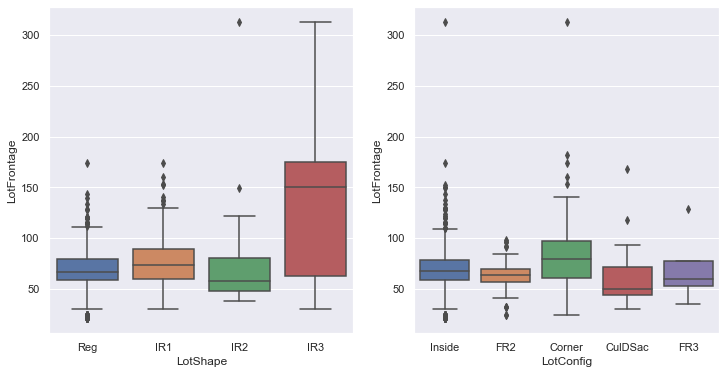

In [9]:
# Make boxplot of columns LotFrontage, LotShape, LotConfig
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=df, x='LotShape', y='LotFrontage', ax=axes[0])
sns.boxplot(data=df, x='LotConfig', y='LotFrontage', ax=axes[1])

In [10]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

From boxplot above, we can get information that any categories of LotShape and LotConfig has median close to LotFrontage's mean. So i decide to fill LotFrontage's missing value with LotFrontage's mean

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

- **Columns MasVnrType and MasVnrArea**

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

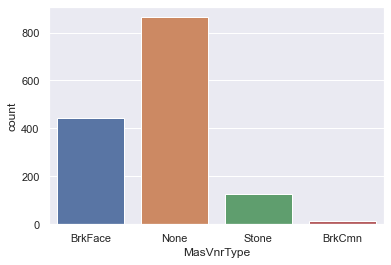

In [12]:
# Check frequency of any categories on column MasVnrType
sns.countplot(data=df, x='MasVnrType')

From countplot above, we know that 'None' category has most frequency than others

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

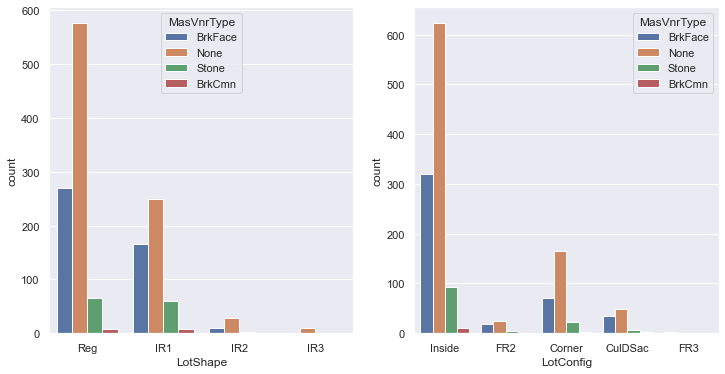

In [13]:
# Make countplot of LotShape, LotConfig, and MasVnrType
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=df, x='LotShape', hue='MasVnrType', ax=axes[0])
sns.countplot(data=df, x='LotConfig', hue='MasVnrType', ax=axes[1])

From countplot above, we may see that 'None' category on column MasVnrType is category with the most number than the others

In [14]:
# check the amount of every category in column MasVnrType
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
df[df['MasVnrType'] == 'None']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

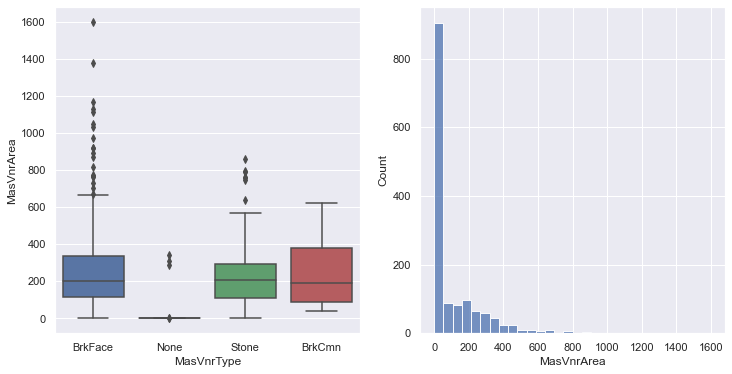

In [17]:
# Make boxplot and subplot of column MasVnrArea
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=df, x='MasVnrType', y='MasVnrArea', ax=axes[0])
sns.histplot(data=df, x='MasVnrArea', bins=30, ax=axes[1])

From boxplot above, we can see that mean of every category in column MasVnrType is close to the value of 200 in column MasVnrArea and we also can look into the second graph (histogram) show that Area 0 has a lot of frequency. MasVnrArea equal to 0 also tell us that there are no one of masonry veneer.

In [18]:
# check amount of data on every category in column MasVnrType 
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
# Make simple dataframe contain MasVnrType and MasVnrArea
split = df[['MasVnrType','MasVnrArea']]
split[df['MasVnrArea'].isnull()]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


From dataframe split above, we may look that missing values on column MasVnrArea has same rows of 'None' category of column MasVnrType, so we decide to fill MasVnrArea missing value with 0

In [20]:
# Fill MasVnrArea missing values
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

- **Handle missing value of BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2**

In [21]:
# Create simple dataframe with several columns below
split_2 = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF']]

In [22]:
# Show simple dataframe with BsmtQual isnull
split_2[split_2['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


From dataframe above, we can see that every missing value in object columns has the same row with area equal to 0. So we decide to fill these missing values with 'NA' meaning there is no basement

In [23]:
# Fill missing values
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

- **Handling missing value columns GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond**

In [24]:
# Make simple dataframe contain sveeral columns below
split_3 = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars','GarageArea', 'OverallQual', 'OverallCond']]
split_3[(split_3['GarageType'].isnull()) & (split_3['OverallQual'] == 4)]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea,OverallQual,OverallCond
39,NaN,NaN,NaN,NaN,NaN,0,0,4,5
48,NaN,NaN,NaN,NaN,NaN,0,0,4,5
78,NaN,NaN,NaN,NaN,NaN,0,0,4,5
89,NaN,NaN,NaN,NaN,NaN,0,0,4,5
99,NaN,NaN,NaN,NaN,NaN,0,0,4,5
140,NaN,NaN,NaN,NaN,NaN,0,0,4,5
163,NaN,NaN,NaN,NaN,NaN,0,0,4,6
287,NaN,NaN,NaN,NaN,NaN,0,0,4,4
393,NaN,NaN,NaN,NaN,NaN,0,0,4,5
434,NaN,NaN,NaN,NaN,NaN,0,0,4,7


From dataframe above, we know that every missing value on every category column has the same row with 0 value of GarageArea. That indicate there is no garage on that particular house. So we can fill missing value on category column with 'NA' meaning there is no garage

In [25]:
# Fill missing values
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')

- **Column Electrical**

<AxesSubplot:xlabel='Electrical', ylabel='OverallCond'>

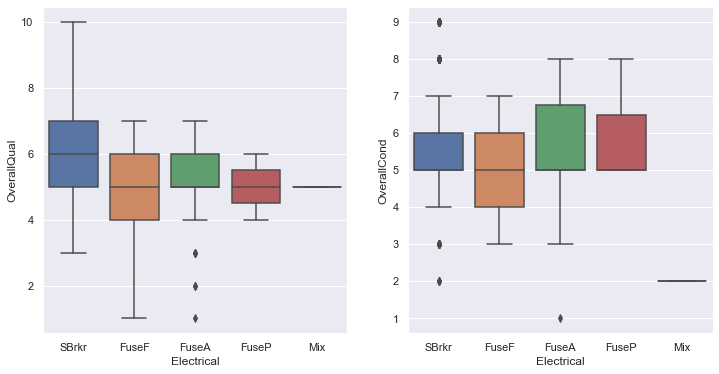

In [26]:
# Make boxplots for relation on column Electrical with OverallQual and OverallCond
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(data=df, x='Electrical', y='OverallQual', ax=axes[0])
sns.boxplot(data=df, x='Electrical', y='OverallCond', ax=axes[1])

In [27]:
# Make simple dataframe contain several columns which i think have relation with column electrical
split_4 = df[['OverallQual', 'OverallCond', 'CentralAir', 'HeatingQC', 'Electrical']]

In [28]:
# Check missing value of column electrical from simple dataframe created before
split_4[split_4['Electrical'].isnull()]

,OverallQual,OverallCond,CentralAir,HeatingQC,Electrical
1379,5,5,Y,Gd,NaN


In [29]:
split_4[split_4['Electrical'] == 'FuseA'].describe()

,OverallQual,OverallCond
count,94.000000,94.000000
mean,4.978723,5.457447
std,1.005134,1.373050
min,1.000000,1.000000
25%,5.000000,5.000000
50%,5.000000,5.000000
75%,6.000000,6.750000
max,7.000000,8.000000


From missing value above, we know that both OverallQual and OverallCond has value 5 (average) is very similar with mean of all the Electrical 'FuseA' and HeatingQC show Gd (good). So we can fill electrical column missing value with FuseA because in the description FuseA has average value

In [30]:
# Fill missing value with FuseA
df['Electrical'] = df['Electrical'].fillna('FuseA')

In [31]:
# Show the overall information of missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

From dataframe information above, we may look that there is no more missing values. So we can go to another feature engineering step

**(c)** **creating dummy variable**

In [32]:
# create dummies dataframe
df_model = pd.get_dummies(data=df)

In [33]:
df_model.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


## Building Model

In [34]:
# drop column SalePrice because column SalePrice is predicted target
X = df_model.drop(['SalePrice'], axis=1)

In [35]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [36]:
# define target variable
y = df_model['SalePrice']

In [37]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
# import train test split to separate data train and test
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
615,616,85,80.0,8800,6,7,1963,1963,156.0,763,...,0,0,0,1,1,0,0,0,0,0
613,614,20,70.0,8402,5,5,2007,2007,0.0,206,...,0,1,0,0,0,0,0,0,0,1
1303,1304,20,73.0,8688,7,5,2005,2005,228.0,0,...,0,0,0,1,0,0,0,0,1,0
486,487,20,79.0,10289,5,7,1965,1965,168.0,836,...,0,0,0,1,0,0,0,0,1,0
561,562,20,77.0,10010,5,5,1974,1975,0.0,1071,...,0,0,0,1,0,0,0,0,1,0


In [41]:
y_train.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [42]:
# Import libraries needed to build model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline

Evaluation error value based on several metrics :
MAE: 18221.57127508658
MSE: 872966792.5965499
RMSE: 29546.01144988186


Score of Linear Regression Model :
 0.881089734940099


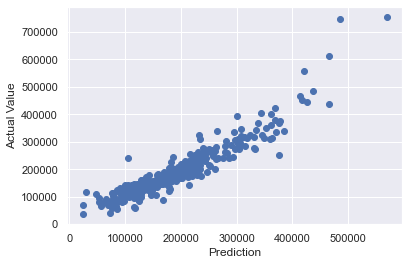

In [98]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction_LR = LR.predict(X_test)
plt.scatter(prediction_LR, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual Value')

# Evaluation metrics
print('Evaluation error value based on several metrics :')
print('MAE:', metrics.mean_absolute_error(y_test, prediction_LR))
print('MSE:', metrics.mean_squared_error(y_test, prediction_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_LR)))
print('\n')
print('Score of Linear Regression Model :\n',LR.score(X_test, y_test))

Evaluation error value based on several metrics :
MAE: 28644.798755186723
MSE: 2250058750.885892
RMSE: 47434.78418719634


Score of Decision Tree Regression Model :
 0.6935105839795165


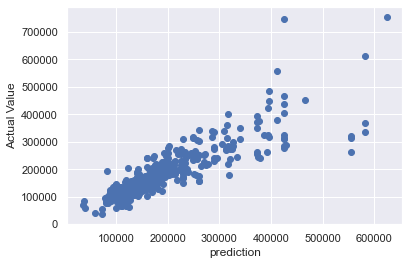

In [99]:
# Decision Tree Regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
prediction_DTR = DTR.predict(X_test)
plt.scatter(prediction_DTR, y_test)
plt.xlabel('prediction')
plt.ylabel('Actual Value')

# Evaluation Metrics
print('Evaluation error value based on several metrics :')
print('MAE:', metrics.mean_absolute_error(y_test, prediction_DTR))
print('MSE:', metrics.mean_squared_error(y_test, prediction_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_DTR)))

print('\n')
print('Score of Decision Tree Regression Model :\n',DTR.score(X_test, y_test))

Evaluation error value based on several metrics :
MAE: 17358.179377593362
MSE: 1012573525.2555481
RMSE: 31820.960470349542


Score of Random Forest Regression Model :
 0.8620733488353639


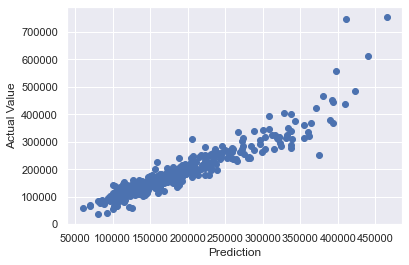

In [100]:
# Random Forest Regressor
RTR = RandomForestRegressor()
RTR.fit(X_train, y_train)
prediction_RTR = RTR.predict(X_test)
plt.scatter(prediction_RTR,y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual Value')

# Evaluation Metrics
print('Evaluation error value based on several metrics :')
print('MAE:', metrics.mean_absolute_error(y_test, prediction_RTR))
print('MSE:', metrics.mean_squared_error(y_test, prediction_RTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_RTR)))

print('\n')
print('Score of Random Forest Regression Model :\n',RTR.score(X_test, y_test))